In [18]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.keras import datasets, layers, models


%matplotlib inline

In [19]:
import keras
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [44]:
(x_train_or, y_train_or), (x_test, y_test) = datasets.mnist.load_data()

In [21]:
x_train_or.shape

(60000, 28, 28)

In [22]:
y_train_or.shape

(60000,)

In [45]:
x_train_or=x_train_or.reshape((60000,28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

In [24]:
y_train_or.shape

(60000,)

In [46]:
x_train_or=x_train_or/255
x_test=x_test/255

In [61]:
model = models.Sequential()
model.add(layers.Conv2D(16, (5, 5), strides=(1, 1),input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization(axis=3, name='bn0'))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(32, (7, 7), strides=(1, 1)))
model.add(layers.BatchNormalization(axis=3, name='bn1'))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2), name='max_pool'))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [62]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 24, 24, 16)        64        
_________________________________________________________________
activation_15 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 18, 18, 32)        25120     
_________________________________________________________________
bn1 (BatchNormalization)     (None, 18, 18, 32)        128       
_________________________________________________________________
activation_16 (Activation)   (None, 18, 18, 32)       

In [63]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [64]:
x_train_or.shape

(60000, 28, 28, 1)

In [65]:
y_train_or.shape

(60000,)

In [66]:
model.fit(x_train_or,y_train_or,epochs=30,batch_size=32,verbose=1,shuffle = 'TRUE')


Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3414 - accuracy: 0.8836
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0681 - accuracy: 0.9801
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0520 - accuracy: 0.9846
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0415 - accuracy: 0.9872
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0367 - accuracy: 0.9890
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0306 - accuracy: 0.9910
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0265 - accuracy: 0.9921
Epoch 8/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0232 - accuracy: 0.9932
Epoch 9/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0236 - accuracy: 0.9934
Epoch 10/30
1875/1875 [==============================] - 12s 6ms/step - l

In [67]:
pred = model.evaluate(x_test, y_test)
accuracy_test=pred[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0314 - accuracy: 0.9933


In [70]:
accuracy_test

0.9933000206947327

In [81]:
x_test_predict=model.predict(x_test)

[0 1 0 0 0 0 0 0 0 0]


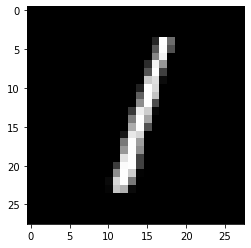

In [84]:
x_temp=x_test[2].reshape((28,28))
plt.imshow(x_temp,cmap = 'gist_gray')
print(x_test_predict[2].astype(int))

In [85]:
import pandas as pd

In [86]:
df=pd.DataFrame(x_test_predict)

In [88]:
df=df.astype(int)
df

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,1,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0


In [90]:
model.save_weights('model.h5')